In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
from pathlib import Path
Path("figures").mkdir(exist_ok=True)

In [8]:
# might need to be run twice for some obscure reason
# latex needs to be installed
fs = 18
rcParams.update({"font.size": fs})
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

# Main figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


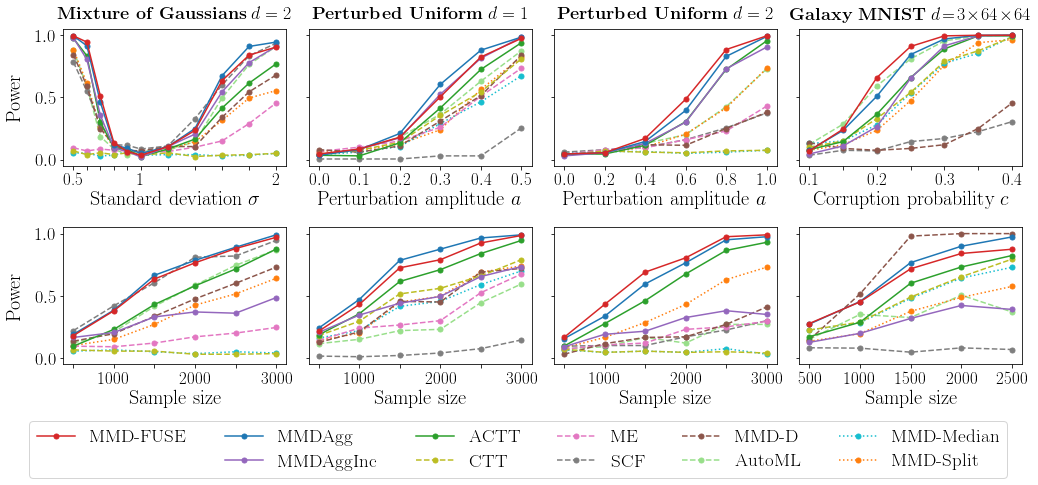

In [9]:
# Main figure
scale = 0.8
f, axs = plt.subplots(2, 4, figsize=(18 * scale, 7 * scale), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.1, hspace=0.45)

# Parameters
markersize = 5
tests_names = ["MMD-FUSE", "MMD-Median", "MMD-Split", "MMDAgg", "MMDAggInc", "MMD-D", "ME", "SCF", "CTT", "ACTT"]
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, met_test, scf_test, ctt_test, actt_test)
styles = ["-",] * len(tests_names) 
styles = [
    'solid',  # MMD-FUSE
    'dotted', # MMD-Median
    'dotted', # MMD-Split
    'solid',  # MMDAgg
    'solid', # MMDAggInc
    'dashed', # MMD-D
    'dashed',  # ME
    'dashed', # SCF
    'dashed', # CTT
    'solid',  # ACTT
]
markers = ["o",] * len(tests_names) 
colors = np.array(["C" + str(i) for i in range(len(tests_names))])[[3, 9, 1, 0, 4, 5, 6, 7, 8, 2]] 
order = [2, 1, 7, 6, 5, 8, 9, 4, 3, 0] 
color_autotst = "#98DF8A"
marker_autotst = "o"
style_autotst = "dashed"
label_autotst = "AutoML"

# Plot 0.0 
idx = (0, 0)
x_axis_len = 4
power = np.load("results/mixture_vary_dif.npy") 
x_axis = np.load("results/mixture_vary_dif_x_axis.npy") 
power_autotst = np.load("results/mixture_vary_dif_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Standard deviation $\sigma$", fontsize=fs+2)
axs[idx].set_ylabel("Power", labelpad=10, fontsize=fs+2)
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels(["0.5", "", "", "", "", "1", "", "", "", "", "2"])
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].set_title(r"\textbf{Mixture of Gaussians} $d=2$", fontsize=fs, pad=10)
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 0.1 
idx = (0, 1)
x_axis_len = 4
power = np.load("results/perturbations_vary_dif_d1.npy") 
x_axis = np.load("results/perturbations_vary_dif_d1_x_axis.npy") 
power_autotst = np.load("results/perturbations_vary_dif_d1_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Perturbation amplitude $a$", fontsize=fs+2)
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].set_title(r"\textbf{Perturbed Uniform} $d=1$", fontsize=fs, pad=10)
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 0.2 
idx = (0, 2)
x_axis_len = 4
power = np.load("results/perturbations_vary_dif_d2.npy") 
x_axis = np.load("results/perturbations_vary_dif_d2_x_axis.npy") 
power_autotst = np.load("results/perturbations_vary_dif_d2_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Perturbation amplitude $a$", fontsize=fs+2)
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].set_title(r"\textbf{Perturbed Uniform} $d=2$", fontsize=fs, pad=10)
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 0.3 
# order of saved results
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, scf_test, ctt_test, actt_test, deep_mmd_test_64)
# want to match 
# tests_names = ["MMD-FUSE", "MMD-Median", "MMD-Split", "MMDAgg", "MMDAggInc", "MMD-D", "ME", "SCF", "CTT", "ACTT"]
array_order = [0, 1, 2, 3, 4, 5, 9, 6, 7, 8]
# ignore 5 (5) deep mmd
# ignore 6 (9) deep mmd 64 which replaces ME
idx = (0, 3)
x_axis_len = 4
x_axis = np.load("results/galaxy_vary_dif_x_axis.npy") 
power = np.load("results/galaxy_vary_dif.npy")[array_order]
power[5] = power[6] # put deep mmd 64 in deep mmd
power_autotst = np.load("results/galaxy_vary_dif_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    if j not in (6, ):
        axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Corruption probability $c$", fontsize=fs+2)
# axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels(["0.1", "", "0.2", "", "0.3", "", "0.4"])
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].set_title(r"\textbf{Galaxy MNIST} $d\!=\!3\!\times\!64\!\times\!64$", fontsize=fs, pad=10)
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 1.0 
idx = (1, 0)
x_axis_len = 4
x_axis = np.load("results/mixture_vary_n_x_axis.npy") 
power = np.load("results/mixture_vary_n.npy") 
power_autotst = np.load("results/mixture_vary_n_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Sample size", fontsize=fs+2)
axs[idx].set_ylabel("Power", labelpad=10, fontsize=fs+2)
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels(["", str(1000), "", str(2000), "", str(3000)])
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 1.1 
idx = (1, 1)
x_axis = np.load("results/perturbations_vary_n_d1_x_axis.npy") 
power = np.load("results/perturbations_vary_n_d1.npy") 
power_autotst = np.load("results/perturbations_vary_n_d1_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].plot(x_axis, [0,] * 6, color='none', label=' ')
axs[idx].set_xlabel(r"Sample size", fontsize=fs+2)
# axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels(["", str(1000), "", str(2000), "", str(3000)])
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 1.2 
idx = (1, 2)
x_axis = np.load("results/perturbations_vary_n_d2_x_axis.npy") 
power = np.load("results/perturbations_vary_n_d2.npy") 
power_autotst = np.load("results/perturbations_vary_n_d2_autotst.npy") 
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Sample size", fontsize=fs+2)
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels(["", str(1000), "", str(2000), "", str(3000)])
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Plot 1.3 
# order of saved results
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, scf_test, ctt_test, actt_test, deep_mmd_test_64)
# want to match 
# tests_names = ["MMD-FUSE", "MMD-Median", "MMD-Split", "MMDAgg", "MMDAggInc", "MMD-D", "ME", "SCF", "CTT", "ACTT"]
array_order = [0, 1, 2, 3, 4, 5, 9, 6, 7, 8]
# ignore 5 (5) deeep mmd
# ignore 6 (9) deep mmd 64 which replaces ME
idx = (1, 3)
x_axis = np.load("results/galaxy_vary_n_x_axis.npy") 
power = np.load("results/galaxy_vary_n.npy")[array_order] 
power[5] = power[6] # put deep mmd 64 in deep mmd
power_autotst = np.load("results/galaxy_vary_n_autotst_3min.npy")
axs[idx].plot(x_axis, power_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    if j not in (6, ):
        axs[idx].plot(x_axis, power[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Sample size", fontsize=fs+2)
# axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)

# Legend
idx = (1, 1)
handles, labels = axs[idx].get_legend_handles_labels()
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, scf_test, ctt_test, actt_test, deep_mmd_test_64)
order_legend = [10, 11, 9, 8, 7, 6, 4, 3, 5, 0, 2, 1] # [2, 1, 7, 6, 5, 8, 9, 4, 3, 0] #(0, 1, 2, 3, 4, 5, 6)
axs[idx].legend(
    [handles[index] for index in order_legend],
    [labels[index] for index in order_legend],
    fontsize=fs+1,
    ncol=6,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=2,
    loc="lower center",
    bbox_to_anchor=(0.94, -0.9),
)

# Save Figure
f.savefig("figures/main_figure.eps", bbox_inches="tight")
f.savefig("figures/main_figure.png", dpi=300, bbox_inches="tight")

# Galaxy MNIST

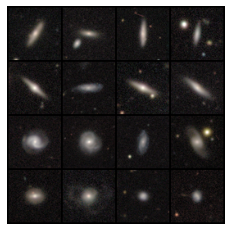

In [12]:
import torchvision
from galaxy_mnist import GalaxyMNIST
import torch

dataset = GalaxyMNIST(  # [3, 64, 64]
    root='./galaxy_data',
    download=True,
    train=False,
)

images = dataset.data
labels = dataset.targets

idx = 2
batch_tensor = torch.cat((
    images[torch.where(labels == 1, True, False)][idx : idx + 4], # 'smooth_cigar'
    images[torch.where(labels == 2, True, False)][idx : idx + 4], # 'edge_on_disk'
    images[torch.where(labels == 3, True, False)][idx : idx + 4], # 'unbarred_spiral'
    images[torch.where(labels == 0, True, False)][idx : idx + 4], # 'smooth_round'
))

grid_img = torchvision.utils.make_grid(batch_tensor, nrow=4)
plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off')

# Save Figure
plt.savefig("figures/galaxy.png", dpi=600, bbox_inches="tight")

# Figure parameters

In [62]:
rc('xtick', labelsize=fs - 1)
rc('ytick', labelsize=fs - 1)

# Mixture

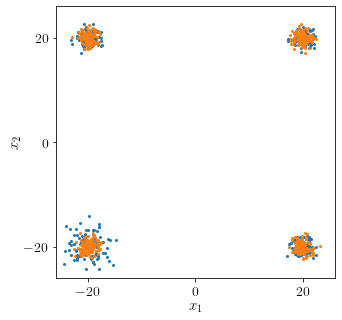

In [67]:
from sampler_mixture import sampler_mixture
from jax import random 

key = random.PRNGKey(0)
key, subkey = random.split(key)
X, Y = sampler_mixture(subkey, m=500, n=500, d=2, mu=20, std_1=1, std_2=2)

f = plt.figure(figsize=(5, 5))
plt.scatter(Y[:, 0], Y[:, 1], color='C0', s=4)
plt.scatter(X[:, 0], X[:, 1], color='C1', s=4)
a = 26
plt.ylim(-a, a)
plt.xlim(-a, a)
plt.ylabel(r"$x_2$", fontsize=fs)
plt.xlabel(r"$x_1$", labelpad=2, fontsize=fs)
plt.xticks((-20, 0, 20))
plt.yticks((-20, 0, 20))
#plt.title(r"\textbf{Mixture of Gaussians} $d=2$", fontsize=fs, pad=10)

# Save Figure
f.savefig("figures/mixture.eps", bbox_inches="tight")
f.savefig("figures/mixture.png", dpi=300, bbox_inches="tight")

# Perturbations

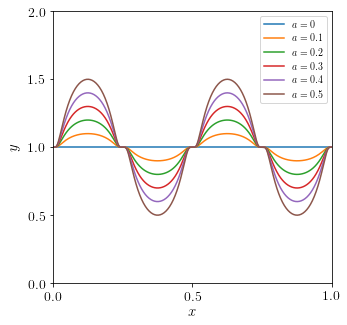

In [66]:
from sampler_perturbations import f_theta

scales = (0, 0.1, 0.2, 0.3, 0.4, 0.5)
number_perturbations = 2
p = number_perturbations
d = 1
s = 1

f = plt.figure(figsize=(5, 5))
xplot = np.linspace(0, 1, 300)
colors = ["C" + str(i) for i in range(len(scales))]
labels = (r"$a = 0$", r"$a = 0.1$", r"$a = 0.2$", r"$a = 0.3$", r"$a = 0.4$", r"$a = 0.5$")
for s in (range(len(scales))):
    scale = scales[s]
    perturbation_multiplier = np.exp(d) * p ** s * scale 
    fplot = [f_theta(x, p, s, perturbation_multiplier, seed=1) for x in xplot]
    plt.plot(xplot, fplot, colors[s], label=labels[s])
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1, 1.5, 2])
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.xlabel(r"$x$", labelpad=2, fontsize=fs)
plt.ylabel(r"$y$", labelpad=8, fontsize=fs)
#plt.title(r"\textbf{Perturbed Uniform} $d=1$", fontsize=fs, pad=10)
plt.legend()

# Figures
f.savefig("figures/perturbations_d1.png", dpi=300, bbox_inches="tight")
f.savefig("figures/perturbations_d1.eps", dpi=300, bbox_inches="tight")

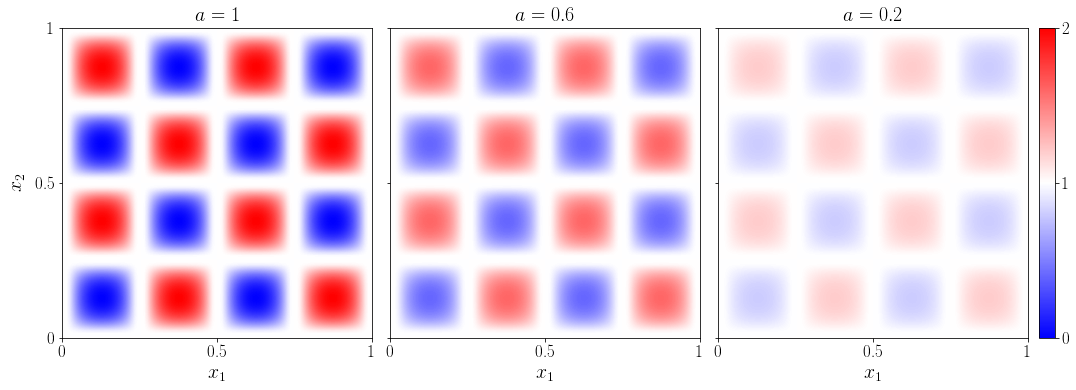

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)

height = 6.2 
width = height / ( (5 ** 0.5 - 1) / 2 * (2 / 3) )

f, axs = plt.subplots(1, 3, figsize=(width, height - 1.2), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=-0.1, hspace=0.25)

scales = (1, 0.6, 0.2)
number_perturbations = 2
p = number_perturbations
d = 2
s = 1

n_points = 100
x = np.linspace(0, 1, n_points)
y = np.linspace(0, 1, n_points)
fs = 15

for idx in range(3):
    scale = scales[idx]
    perturbation_multiplier = np.exp(d) * p ** s * scale 
    z = np.array(
        [
            f_theta(
                np.concatenate((np.atleast_1d(j), np.atleast_1d(i))),
                p,
                s,
                perturbation_multiplier,
                13,
            )
            for j in y
            for i in x
        ]
    )
    Z = z.reshape(n_points, n_points)
    im1 = axs[idx].imshow(
        Z, origin="lower", interpolation="bilinear", extent=[0, 1, 0, 1], cmap="bwr", vmin=0, vmax=2,
    )
    divider = make_axes_locatable(axs[idx])
    if idx == 2:
        cax = divider.append_axes("right", size="5%", pad=0.15)
        cbar = f.colorbar(im1, cax=cax, orientation="vertical")
        cbar.set_ticks([0, 1, 2])
    else:
        cax = divider.append_axes("right", size="5%", pad=0.15)
        cax.axis('off')
    axs[idx].set_yticks([0, 0.5, 1])
    axs[idx].set_xticks([0, 0.5, 1])
    axs[idx].set_xticklabels(["0", "0.5", "1"])
    axs[idx].set_yticklabels(["0", "0.5", "1"])
axs[0].set_title(r"$a = 1$", fontsize=fs+5, pad=7)
axs[1].set_title(r"$a = 0.6$", fontsize=fs+5, pad=7)
axs[2].set_title(r"$a = 0.2$", fontsize=fs+5, pad=7)
axs[0].set_ylabel(r"$x_2$", labelpad=10, fontsize=fs+5)
axs[0].set_xlabel(r"$x_1$", labelpad=5, fontsize=fs+5)
axs[1].set_xlabel(r"$x_1$", labelpad=5, fontsize=fs+5)
axs[2].set_xlabel(r"$x_1$", labelpad=5, fontsize=fs+5)

# Figures
f.savefig("figures/perturbations_d2.png", dpi=300, bbox_inches="tight")
f.savefig("figures/perturbations_d2.eps", dpi=300, bbox_inches="tight")

# Speed

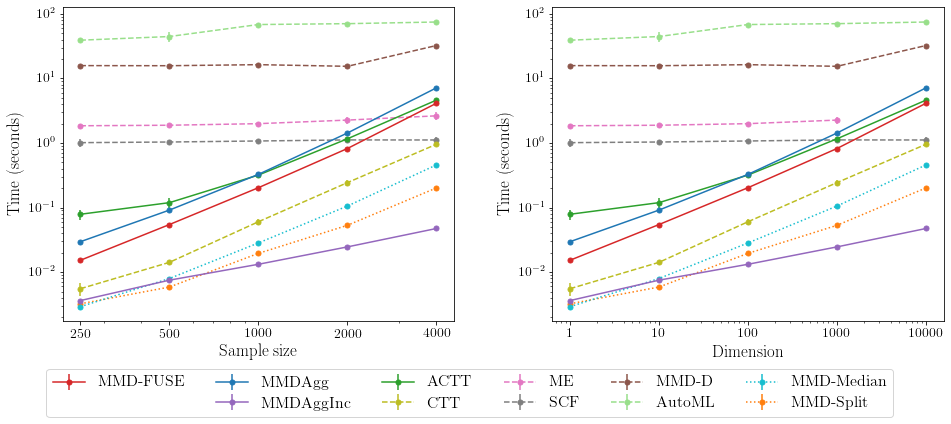

In [65]:
f, axs = plt.subplots(1, 2, figsize=(13, 5))
f.tight_layout()
f.subplots_adjust(wspace=0.25, hspace=0.25)

# Parameters
markersize = 5
tests_names = ["MMD-FUSE", "MMD-Median", "MMD-Split", "MMDAgg", "MMDAggInc", "MMD-D", "ME", "SCF", "CTT", "ACTT"]
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, met_test, scf_test, ctt_test, actt_test)
styles = ["-",] * len(tests_names) 
styles = [
    'solid',  # MMD-FUSE
    'dotted', # MMD-Median
    'dotted', # MMD-Split
    'solid',  # MMDAgg
    'solid', # MMDAggInc
    'dashed', # MMD-D
    'dashed',  # ME
    'dashed', # SCF
    'dashed', # CTT
    'solid',  # ACTT
]
markers = ["o",] * len(tests_names)
colors = np.array(["C" + str(i) for i in range(len(tests_names))])[[3, 9, 1, 0, 4, 5, 6, 7, 8, 2]] 
order = [2, 1, 7, 6, 5, 8, 9, 4, 3, 0]
color_autotst = "#98DF8A"
marker_autotst = "o"
style_autotst = "dashed"
label_autotst = "AutoML"

# Plot 0
idx = 0
time_mean = np.load("results/runtimes_vary_n_mean.npy")
time_std = np.load("results/runtimes_vary_n_std.npy")
x_axis = np.load("results/runtimes_vary_n_x_axis.npy")
time_mean_autotst = np.load("results/runtimes_vary_n_autotst_mean.npy")
time_std_autotst = np.load("results/runtimes_vary_n_autotst_std.npy")
ylims = (80, 5, 1)
axs[idx].errorbar(x_axis, time_mean_autotst[0], time_std_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    axs[idx].errorbar(x_axis, time_mean[j], time_std[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].set_xlabel(r"Sample size", fontsize=fs+2, labelpad=5)
axs[idx].set_yscale('log')
axs[idx].set_xscale('log')
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels([str(i) for i in x_axis])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)
axs[idx].set_ylabel("Time (seconds)", labelpad=5, fontsize=fs+2)

# Plot 1
idx = 1
power = np.load("results/runtimes_vary_d_mean.npy")
x_axis = np.load("results/runtimes_vary_d_x_axis.npy")
power_autotst = np.load("results/runtimes_vary_d_autotst_mean.npy")
ylims = (80, 5, 1)
axs[idx].errorbar(x_axis, time_mean_autotst[0], time_std_autotst[0], color=color_autotst, marker=marker_autotst, linestyle=style_autotst, label=label_autotst, markersize=markersize)
for j in order:
    if j == 6:
        axs[idx].errorbar(x_axis[:-1], time_mean[j][:-1], time_std[j][:-1], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
    else:
        axs[idx].errorbar(x_axis, time_mean[j], time_std[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j], markersize=markersize)
axs[idx].plot(x_axis, [0,] * len(x_axis), color='none', label=' ')
axs[idx].set_xlabel(r"Dimension", fontsize=fs+2, labelpad=5)
axs[idx].set_yscale('log')
axs[idx].set_xscale('log')
axs[idx].set_xticks(x_axis)
axs[idx].set_xticklabels([str(i) for i in x_axis])
axs[idx].tick_params(axis='x', which='major', labelsize=fs - 1)
axs[idx].set_ylabel("Time (seconds)", labelpad=5, fontsize=fs+2)

# Legend
idx = 1
handles, labels = axs[idx].get_legend_handles_labels()
# tests = (mmdfuse_test, mmd_median_test, mmd_split_test, mmdagg_test, mmdagginc_test, deep_mmd_test, scf_test, ctt_test, actt_test, deep_mmd_test_64)
order_legend = [11, 0, 10, 9, 8, 7, 5, 4, 6, 1, 3, 2] 
axs[idx].legend(
    [handles[index] for index in order_legend],
    [labels[index] for index in order_legend],
    fontsize=fs+1,
    ncol=6,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=2,
    loc="lower center",
    bbox_to_anchor=(-0.21, -0.33),
)

# Save Figure
f.savefig("figures/speed.eps", bbox_inches="tight")
f.savefig("figures/speed.png", dpi=300, bbox_inches="tight")

# CIFAR

In [4]:
cifar_all = np.load("results/cifar.npy")
tests = ("mmdfuse", "mmd_median", "mmd_split", "mmdagg", "mmdagginc", "ctt", "actt")
for t in range(len(tests)):
    print(tests[t])
    print(cifar_all[t])
    print(" ")

print("autotst")
print(np.load("results/cifar_autotst.npy")[0])

mmdfuse
0.9366197
 
mmd_median
0.67800003
 
mmd_split
0.25100002
 
mmdagg
0.883
 
mmdagginc
0.28077313
 
ctt
0.711
 
actt
0.652
 
autotst
0.5438067
